In [1]:
#General
import os
import cv2
import numpy as np
import copy
import torch
import pprint
import random

# custom code
from detectron2.utils.visualizer import Visualizer
from zebrafish.configs import get_default_instance_segmentation_config, load_config, get_rs_101_instance_segmentation_config, update_output_dir_path
from zebrafish.dataset import register_datasets, load_all_image_in_dataset
from zebrafish.evaluation import coco_evaluation, coco_evaluation_all_model
from zebrafish.model import predict
from zebrafish.trainers import TrainingUtil
from zebrafish.visualization import plot_prediction, plot_train_vs_validation_loss, plot_segementation, plot_segementation_vs_real
from zebrafish.utils import is_in_main_dir
from zebrafish.trainers.LossEvalHook import LossEvalHook

#detectron
from detectron2.utils.logger import setup_logger
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader, build_detection_train_loader, DatasetMapper, detection_utils as utils, transforms as T
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(depth=6)
setup_logger()

if "notebooks" in os.getcwd() and "colab" in os.getcwd():
    os.chdir("..")
    os.chdir("..")

assert is_in_main_dir(), "The notebook expectes you to be in the main directory"

register_datasets("dataset")


Bad key "text.kerning_factor" on line 4 in
/home/jordi/miniconda3/envs/detectron2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


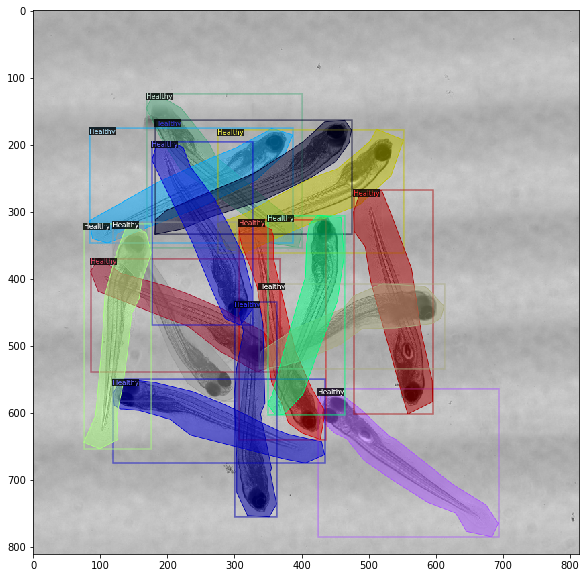

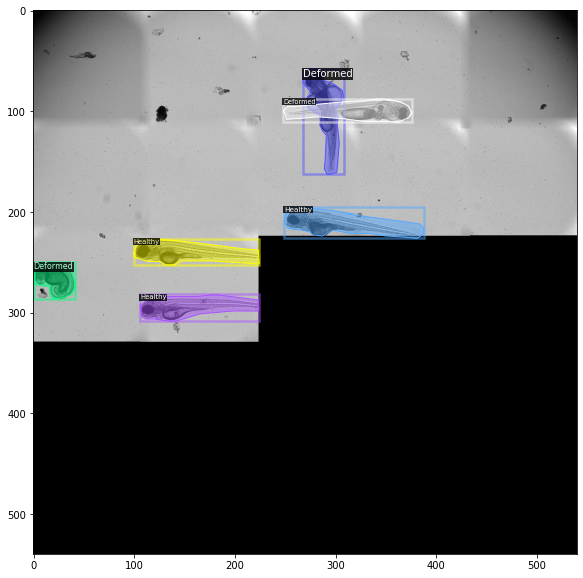

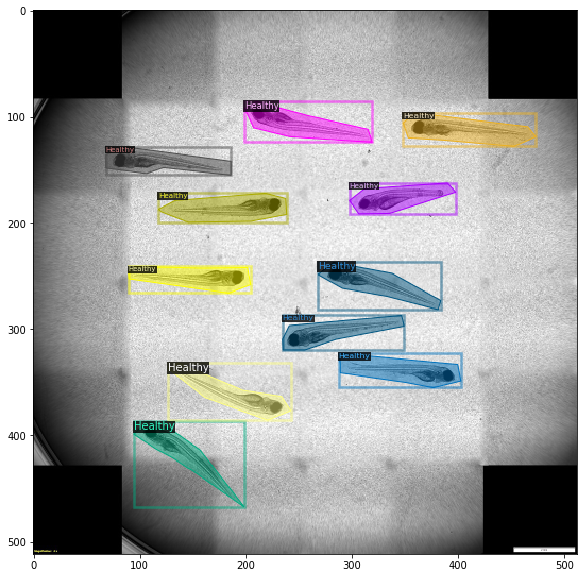

In [3]:
dataset_name = "test_direction"
dataset_dicts = DatasetCatalog.get(dataset_name)
metadata = MetadataCatalog.get(dataset_name)
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)

    plt.figure(figsize=(14, 10))
    plt.imshow(cv2.cvtColor(vis.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()